# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [114]:
m=1
run = 1

1

Choose your grid

In [115]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [116]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [117]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [118]:
print(N)

200.0

In [119]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [120]:
using Printf
include("./TMYangMillsTHREE.jl");

In [121]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.005
the time step is 0.0025


# Initial data of m β Ψ and Ψ,x

In [122]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
A=0.00886#0.08865958683658391#0.0884375
r0=0.3
sigma=0.1

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [123]:
(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

LoadError: syntax: extra token "were" after end of expression

In [124]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

201×3 Matrix{Float64}:
 0.0          0.0           0.0
 1.91071e-13  2.30745e-11   7.56058e-9
 9.54149e-13  7.7558e-11    2.04125e-8
 2.70574e-12  1.61583e-10   4.12553e-8
 6.59489e-12  3.07778e-10   7.39629e-8
 1.5018e-11   5.7114e-10    1.24037e-7
 3.28661e-11  1.05048e-9    1.99213e-7
 6.99318e-11  1.92336e-9    3.10273e-7
 1.45472e-10  3.50633e-9    4.72106e-7
 2.96712e-10  6.35823e-9    7.05106e-7
 5.94428e-10  1.14554e-8    1.03696e-6
 1.17104e-9   2.04848e-8    1.50498e-6
 2.27041e-9   3.63284e-8    2.15896e-6
 ⋮                         
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.00144871   0.0041337    -2.77107e-10
 0.001448

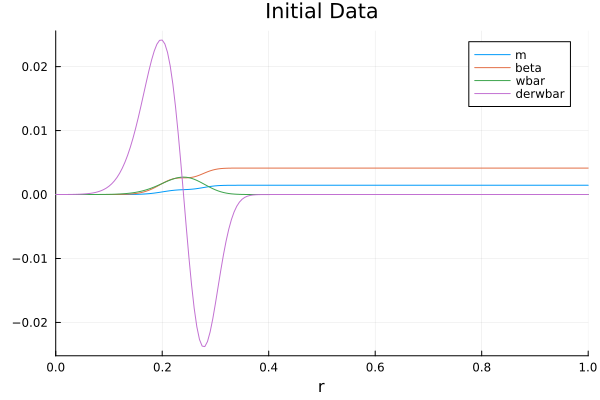

In [125]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [126]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [127]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [128]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [129]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.40403020126962336


In [130]:
using Base.Threads
Threads.nthreads()

4

In [131]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.00633174266623115

In [132]:
dt=0.002/2^(m-1)

0.002

 ## Time evolution

fixed grid

In [133]:
finaltime=1.5
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 500 dt is 0.00101007550589506, t=0.5050377517647526 speed is 0.49501249865170643, dx/dt=4.950124986517063


iteration 1000 dt is 0.0010100755032589036, t=1.0100755041866527 speed is 0.49501249994362007, dx/dt=4.950124999436201
